In [1]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
#import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

#import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
#import matplotlib.gridspec as gridspec
#import seaborn as sns; sns.set()
import ast

from datetime import date, time, datetime
import calendar

import pandas as pd
import emoji
import regex as re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from deep_translator import GoogleTranslator


import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/wz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
reviewer_reviews = pd.read_csv('all_reviewer_reviews.csv', index_col=0)
restaurant_reviews = pd.read_csv('cleaned_restaurant_reviews.csv', index_col = 0)

In [4]:
reviewer_reviews = reviewer_reviews.drop_duplicates()
reviewer_reviews.head()

,name,address,review,date,link,reviewer,keep
0,Ya Kun Kaya Toast,"2 Tampines Central 5, Singapore",\nBreakfast \nSet A (S$5.60)\nKaya butter toas...,3h ago,https://www.burpple.com/ya-kun-kaya-toast-66?b...,alamakgirl,1
1,511 Lor Mee,"509 Bedok North Street 3, Singapore",\nLunch\nLor Mee (S$4.50)\nKueh tiao topped wi...,5h ago,https://www.burpple.com/511-lor-mee?bp_ref=%2F...,alamakgirl,1
2,McDonald's,"60 Yishun Avenue 4, Yishun",\nSupper\nQuarter Pounder with Cheese Meal (S$...,19h ago,https://www.burpple.com/mcdonalds-555?bp_ref=%...,alamakgirl,1
3,Tian Yu Tian Fish Head Steamboat,"537 Bedok North Street 3, Singapore",\nZi Char\nCrispy Noodles (S$4.50)\n,1d ago,https://www.burpple.com/tian-yu-tian-fish-head...,alamakgirl,1
4,Kiroi Freshly Baked Cheese Cake,"123 Bukit Merah Lane 1, Singapore",\nCake\nOriginal (S$9)\nSoft and pillowy. Japa...,1d ago,https://www.burpple.com/kiroi-freshly-baked-ch...,alamakgirl,1


In [5]:
# remove restaurants that are not in available in all_restaurant_reviews 
unique_restaurants = restaurant_reviews['url'].unique()
reviews_available = reviewer_reviews[reviewer_reviews['link'].isin(unique_restaurants)]

In [6]:
# change in number of reviews
result = reviewer_reviews[['reviewer','link']].groupby('reviewer').count().reset_index()
result['num_reviews_available'] = list(reviews_available[['reviewer','link']].groupby('reviewer').count()['link'])
result.rename({'link':'num_reviews_before'}, axis = 1)

,reviewer,num_reviews_before,num_reviews_available
0,DanielFoodDiary,122,26
1,Eatravel,1793,624
2,MightyFoodie,1629,461
3,Vanessa_Kou,788,248
4,alamakgirl,2727,477
5,iSteven,46,16
6,juliuslim,1333,392
7,thefoodcompendium,4479,1763
8,thiampeng,3133,809
9,veronicaphua,624,278


In [7]:
# drop danielfooddiary and isteven due to lack of reviews
reviewers_to_keep = list(result[result['num_reviews_available']>=100]['reviewer'])
final_reviews = reviews_available[reviews_available['reviewer'].isin(reviewers_to_keep)]
final_reviews

,name,address,review,date,link,reviewer,keep
12,Kazoku Japanese Cuisine,"1 Goldhill Plaza, Singapore ...",\n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...,4d ago,https://www.burpple.com/kazoku-japanese-cuisin...,alamakgirl,1
31,Tigerlily Patisserie,"350 Joo Chiat Road, Singapore ...","\nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...",Feb 26 at 12:44pm,https://www.burpple.com/tigerlily-patisserie?b...,alamakgirl,1
32,Putien (Northpoint City) ...,"930 Yishun Avenue 2, Singapore ...",\nBirthday Treat \n20% discount \nValid during...,Feb 24 at 10:47pm,https://www.burpple.com/putien-8?bp_ref=%2Ff%2...,alamakgirl,1
35,Our Tampines Hub Hawker Centre (...,"1 Tampines Walk, Singapore ...",\nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...,Feb 24 at 8:33am,https://www.burpple.com/our-tampines-hub?bp_re...,alamakgirl,1
51,Hokkaido Ramen Santouka (Clarke ...,"6 Eu Tong Sen Street, Singapore ...",\nBirthday Treat\n50% off Tokusen Toroniku Ram...,Feb 19 at 12:27pm,https://www.burpple.com/hokkaido-ramen-santouk...,alamakgirl,1
...,...,...,...,...,...,...,...
4473,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...","\nBaby Spinach Vermicelli 5.5++\nAgain, light ...","Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1
4474,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...",\nChengdu Salivating Chicken 10.8++\nWow this ...,"Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1
4475,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...",\nStewed Bamboo Shoots 7.8++\nWow this wasnt w...,"Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1
4476,Paradise Dynasty (Westgate) ...,"3 Gateway Drive, Singapore ...",\nDan Dan Mian 8.8++\nReally restaurant standa...,"Jan 2, 2020",https://www.burpple.com/paradise-dynasty-10?bp...,thefoodcompendium,1


In [8]:
data = final_reviews

In [9]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [10]:
#decontraction
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"didn\'t", "did not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    phrase = re.sub(r"o\'clock", "clock", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)
    phrase = re.sub(r"that\'s", "that is", phrase)       
    phrase = re.sub(r"go-around", "go around", phrase)  
    # general
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    #phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
def clean_text(df, deemojize=False, clean_punctuation=False, remove_stopwords=False, lemmatize=False, stemming=False):
    text_list = df['review']

    stopwords = nltk.corpus.stopwords.words('english')
    new_stopwords = ['address', 'note', 'tel', 'website', 'open', 'burpple']
    add_stopwords = set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
        "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
        'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
        'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
        'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
        'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
        'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
        'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
        'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
        'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
        's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
        've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
        "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
        'won', "won't", 'wouldn', "wouldn't"])
    add_stopwords_2 =  ['n','s','m','i','1','2','3','4','5','6','7','8','9','10','one','two',
        'it','in','ve','well','could','would','really','also','even',
        'alway','always','still','never','much','thing','yet',
        'said','asked','did','go','got','do','make','know','think','come','going',
        'put','went','seem','order','ordered','give','eat','make','get']
    
    stopwords.extend(new_stopwords)
    stopwords.extend(add_stopwords)
    stopwords.extend(add_stopwords_2)

    ####FOR SENTIMENT ANALYSIS< UNCOMMENT THIS
    not_stopwords = {'no','nor','not'} 
    stopwords = set([word for word in stopwords if word not in not_stopwords])

    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()
    cleaned_text_list = []
    count = 0
    for text in text_list:

        # lower case
        text = text.lower()
    
        if deemojize:
            text = emoji.demojize(text)
    
        if clean_punctuation:
            text = re.sub(r'[^\w\s]', '', text)

        # translate to english
        text = GoogleTranslator(source='auto', target='en').translate(text)
    
        # tokenize
        tokens = word_tokenize(text)

        tokens = [decontracted(word) for word in tokens]

        if remove_stopwords:
            tokens = [word for word in tokens if word not in stopwords]
            tokens = [word for word in tokens if 'http' not in word]
            tokens = [word for word in tokens if 'www' not in word]

        if lemmatize:
            # POS tagging
            tokens = [nltk.pos_tag([word]) for word in tokens]
            # lemmatization
            tokens = [lemmatizer.lemmatize(word[0][0], get_wordnet_pos(word[0][1])) 
                if get_wordnet_pos(word[0][1])!=None else lemmatizer.lemmatize(word[0][0]) for word in tokens]
    
        if stemming:
            tokens = [ps.stem(word) for word in tokens]
    
        # concatenate tokens back
        cleaned_text = " ".join(tokens)
        cleaned_text_list.append(cleaned_text)

        if count%1000 == 0:
            print(count)
        count+=1

    df['cleaned_text'] = cleaned_text_list
    
    return df

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/wz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/wz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
cleaned_df = clean_text(data, deemojize=True, clean_punctuation=True, remove_stopwords=True, lemmatize=True, stemming=False)

0
1000
2000
3000
4000
5000


In [14]:
cleaned_df.head(5)

,name,address,review,date,link,reviewer,keep,cleaned_text
12,Kazoku Japanese Cuisine,"1 Goldhill Plaza, Singapore ...",\n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...,4d ago,https://www.burpple.com/kazoku-japanese-cuisin...,alamakgirl,1,1for1 kazoku chirashi s2990 thick slice tuna s...
31,Tigerlily Patisserie,"350 Joo Chiat Road, Singapore ...","\nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...",Feb 26 at 12:44pm,https://www.burpple.com/tigerlily-patisserie?b...,alamakgirl,1,brunch beehive s15 lemon thyme lychee honey je...
32,Putien (Northpoint City) ...,"930 Yishun Avenue 2, Singapore ...",\nBirthday Treat \n20% discount \nValid during...,Feb 24 at 10:47pm,https://www.burpple.com/putien-8?bp_ref=%2Ff%2...,alamakgirl,1,birthday treat 20 discount valid birthday mont...
35,Our Tampines Hub Hawker Centre (...,"1 Tampines Walk, Singapore ...",\nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...,Feb 24 at 8:33am,https://www.burpple.com/our-tampines-hub?bp_re...,alamakgirl,1,set c set c s250 co friday s250 cashback pay p...
51,Hokkaido Ramen Santouka (Clarke ...,"6 Eu Tong Sen Street, Singapore ...",\nBirthday Treat\n50% off Tokusen Toroniku Ram...,Feb 19 at 12:27pm,https://www.burpple.com/hokkaido-ramen-santouk...,alamakgirl,1,birthday treat 50 tokusen toroniku ramen s23 s...


In [15]:
# Check if there is any null value
cleaned_df.isna().apply(pd.value_counts)

,name,address,review,date,link,reviewer,keep,cleaned_text
False,5052.0,5049,5052.0,5052.0,5052.0,5052.0,5052.0,5052.0
True,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# we drop these reviews.
cleaned_df = cleaned_df[~cleaned_df['address'].isna()]

In [17]:
# Check if there is any null value
cleaned_df.isna().apply(pd.value_counts)

,name,address,review,date,link,reviewer,keep,cleaned_text
False,5049,5049,5049,5049,5049,5049,5049,5049


## Sentiment Analysis

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
n = len(cleaned_df)
n

5049

In [21]:
sid_obj = SentimentIntensityAnalyzer()
cleaned_df["Sentiment_score"] = cleaned_df["cleaned_text"].apply(lambda x: round(sid_obj.polarity_scores(x)['compound'],4))
cleaned_df.head()

,name,address,review,date,link,reviewer,keep,cleaned_text,Sentiment_score
12,Kazoku Japanese Cuisine,"1 Goldhill Plaza, Singapore ...",\n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...,4d ago,https://www.burpple.com/kazoku-japanese-cuisin...,alamakgirl,1,1for1 kazoku chirashi s2990 thick slice tuna s...,0.9035
31,Tigerlily Patisserie,"350 Joo Chiat Road, Singapore ...","\nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...",Feb 26 at 12:44pm,https://www.burpple.com/tigerlily-patisserie?b...,alamakgirl,1,brunch beehive s15 lemon thyme lychee honey je...,0.9371
32,Putien (Northpoint City) ...,"930 Yishun Avenue 2, Singapore ...",\nBirthday Treat \n20% discount \nValid during...,Feb 24 at 10:47pm,https://www.burpple.com/putien-8?bp_ref=%2Ff%2...,alamakgirl,1,birthday treat 20 discount valid birthday mont...,0.4019
35,Our Tampines Hub Hawker Centre (...,"1 Tampines Walk, Singapore ...",\nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...,Feb 24 at 8:33am,https://www.burpple.com/our-tampines-hub?bp_re...,alamakgirl,1,set c set c s250 co friday s250 cashback pay p...,-0.1027
51,Hokkaido Ramen Santouka (Clarke ...,"6 Eu Tong Sen Street, Singapore ...",\nBirthday Treat\n50% off Tokusen Toroniku Ram...,Feb 19 at 12:27pm,https://www.burpple.com/hokkaido-ramen-santouk...,alamakgirl,1,birthday treat 50 tokusen toroniku ramen s23 s...,0.4019


In [22]:
cleaned_df['Sentiment'] = cleaned_df['Sentiment_score'].apply(lambda x:  'positive' if 0.05 <= x  else 'negative' if x <= -0.05 else 'neutral')
cleaned_df.head()

,name,address,review,date,link,reviewer,keep,cleaned_text,Sentiment_score,Sentiment
12,Kazoku Japanese Cuisine,"1 Goldhill Plaza, Singapore ...",\n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...,4d ago,https://www.burpple.com/kazoku-japanese-cuisin...,alamakgirl,1,1for1 kazoku chirashi s2990 thick slice tuna s...,0.9035,positive
31,Tigerlily Patisserie,"350 Joo Chiat Road, Singapore ...","\nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...",Feb 26 at 12:44pm,https://www.burpple.com/tigerlily-patisserie?b...,alamakgirl,1,brunch beehive s15 lemon thyme lychee honey je...,0.9371,positive
32,Putien (Northpoint City) ...,"930 Yishun Avenue 2, Singapore ...",\nBirthday Treat \n20% discount \nValid during...,Feb 24 at 10:47pm,https://www.burpple.com/putien-8?bp_ref=%2Ff%2...,alamakgirl,1,birthday treat 20 discount valid birthday mont...,0.4019,positive
35,Our Tampines Hub Hawker Centre (...,"1 Tampines Walk, Singapore ...",\nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...,Feb 24 at 8:33am,https://www.burpple.com/our-tampines-hub?bp_re...,alamakgirl,1,set c set c s250 co friday s250 cashback pay p...,-0.1027,negative
51,Hokkaido Ramen Santouka (Clarke ...,"6 Eu Tong Sen Street, Singapore ...",\nBirthday Treat\n50% off Tokusen Toroniku Ram...,Feb 19 at 12:27pm,https://www.burpple.com/hokkaido-ramen-santouk...,alamakgirl,1,birthday treat 50 tokusen toroniku ramen s23 s...,0.4019,positive


## Bar plot for reviews by Sentiment

<Axes: >

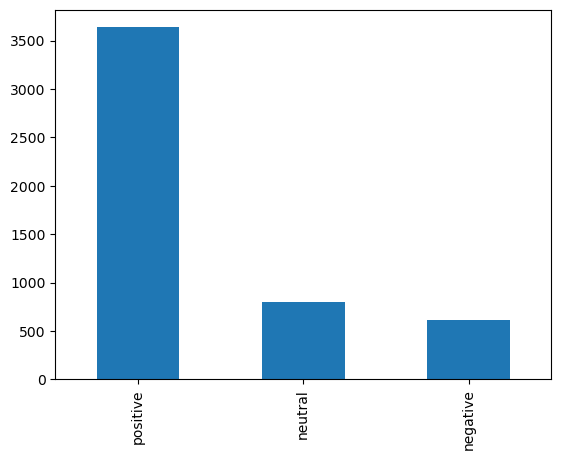

In [25]:

cleaned_df['Sentiment'].value_counts().plot(kind='bar')